#Data Cleaning and Preparation

In [ ]:
# import the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data conection
#Demand
sheets = pd.ExcelFile('/content/drive/MyDrive/Data/Final Project/Demand.xlsx').sheet_names
print(sheets)
Demand = pd.read_excel('/content/drive/MyDrive/Data/Final Project/Demand.xlsx',sheet_name=sheets)
Demand

['Sheet1', 'Sheet2', 'Sheet3']


{'Sheet1':            DemandDateTime  Demand
 0     2013-01-01 00:00:00  Normal
 1     2013-01-01 00:30:00  Normal
 2     2013-01-01 01:00:00  Normal
 3     2013-01-01 01:30:00  Normal
 4     2013-01-01 02:00:00  Normal
 ...                   ...     ...
 17515 2013-12-31 21:30:00  Normal
 17516 2013-12-31 22:00:00  Normal
 17517 2013-12-31 22:30:00  Normal
 17518 2013-12-31 23:00:00  Normal
 17519 2013-12-31 23:30:00  Normal
 
 [17520 rows x 2 columns],
 'Sheet2': Empty DataFrame
 Columns: []
 Index: [],
 'Sheet3': Empty DataFrame
 Columns: []
 Index: []}

`Demand.xlsx` File contain Three sheets

Sheet one :contain the data

Sheet two :Empty Sheet

Sheet three :Empty Sheet

In [ ]:
Demand_df = pd.DataFrame(Demand['Sheet1'])
Demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


In [ ]:
Demand_df

,DemandDateTime,Demand
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
...,...,...
17515,2013-12-31 21:30:00,Normal
17516,2013-12-31 22:00:00,Normal
17517,2013-12-31 22:30:00,Normal
17518,2013-12-31 23:00:00,Normal


##conclusion on Demand_df

1-No Null Values

2- Date Types are correct


In [ ]:
file1 = pd.read_csv('/content/drive/MyDrive/Data/Final Project/Sites Energy Consumption Part_001.csv')
file2 = pd.read_csv('/content/drive/MyDrive/Data/Final Project/Sites Energy Consumption Part_002.csv')
file3 = pd.read_csv('/content/drive/MyDrive/Data/Final Project/Sites Energy Consumption Part_003.csv')
total =[]
total.append(file1)
total.append(file2)
total.append(file3)
SEC = pd.concat(total,axis=0)
SEC

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,"00:00:00 13,01,01",0.219,A,A
1,MAC000002,"00:30:00 13,01,01",0.241,A,A
2,MAC000002,"01:00:00 13,01,01",0.191,A,A
3,MAC000002,"01:30:00 13,01,01",0.235,A,A
4,MAC000002,"02:00:00 13,01,01",0.182,A,A
...,...,...,...,...,...
450962,MAC000100,"18:30:00 13,20,12",0.260,N,B
450963,MAC000100,"19:00:00 13,20,12",0.267,N,B
450964,MAC000100,"19:30:00 13,20,12",0.274,N,B
450965,MAC000100,"20:00:00 13,20,12",0.312,N,B


In [ ]:
SEC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1380252 entries, 0 to 450966
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cell_id                  1380252 non-null  object 
 1   DateTime                 1380252 non-null  object 
 2   KWH/hh (per half hour)   1380252 non-null  float64
 3   site_id                  1380252 non-null  object 
 4   region                   1380252 non-null  object 
dtypes: float64(1), object(4)
memory usage: 63.2+ MB


##Conclusion on Sites Energy Consumption

1- file is missing some record as the expected no.`1436640` Not `1380252`

2- ` DateTime` column must be Datetime type

## Data Cleaning

In [ ]:
#Demand_df Cleaning

Demand_df['Demand'].value_counts()

,count
Demand,
Normal,15069
Low,1660
High,785
high,3
normal,2
Normall,1


The demand column contains values expressed in various formats that represent the same underlying amount.
(correct the values caplization and writing)

In [ ]:
val = {'Normall':'Normal',
       'normal':'Normal',
       'high':'High'}
Demand_df['Demand'] = Demand_df['Demand'].replace(val)
Demand_df['Demand'].value_counts()

,count
Demand,
Normal,15072
Low,1660
High,788


In [ ]:
Demand_df['DateTime'] = pd.to_datetime(Demand_df['DemandDateTime'],format='%Y-%m-%d %H:%M:%S')
Demand_df.drop('DemandDateTime',axis=1,inplace=True)
Demand_df

,Demand,DateTime
0,Normal,2013-01-01 00:00:00
1,Normal,2013-01-01 00:30:00
2,Normal,2013-01-01 01:00:00
3,Normal,2013-01-01 01:30:00
4,Normal,2013-01-01 02:00:00
...,...,...
17515,Normal,2013-12-31 21:30:00
17516,Normal,2013-12-31 22:00:00
17517,Normal,2013-12-31 22:30:00
17518,Normal,2013-12-31 23:00:00


In [ ]:
# Cheak duplicates
# In demand_df
print(f"No. of duplicates in Demand: {Demand_df.duplicated().sum()}")

No. of duplicates in Demand: 0


In [ ]:
#SEC Cleaning
#DateTime data type
SEC['DateTime'].head()

,DateTime
0,"00:00:00 13,01,01"
1,"00:30:00 13,01,01"
2,"01:00:00 13,01,01"
3,"01:30:00 13,01,01"
4,"02:00:00 13,01,01"


In [ ]:
SEC['DateTime'] = pd.to_datetime(SEC['DateTime'],format="%H:%M:%S %y,%d,%m")
SEC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1380252 entries, 0 to 450966
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   cell_id                  1380252 non-null  object        
 1   DateTime                 1380252 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   1380252 non-null  float64       
 3   site_id                  1380252 non-null  object        
 4   region                   1380252 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 63.2+ MB


In [ ]:
# Cheak duplicates
# In Sites Energy Consumption
print(f"No. of duplicates in Sites Energy Consumption:{SEC.duplicated().sum()}")

No. of duplicates in Sites Energy Consumption:942


In [ ]:
#Drop duplicates
SEC.drop_duplicates(inplace=True)
print(f"No. of duplicates in Sites Energy Consumption:{SEC.duplicated().sum()}")

No. of duplicates in Sites Energy Consumption:0


In [ ]:
# reading of each cell
val_cell=pd.pivot_table(data=SEC,values='DateTime',index='cell_id',aggfunc='count')
val_cell

,DateTime
cell_id,
MAC000002,17520
MAC000003,17518
MAC000004,17519
MAC000006,17520
MAC000007,17517
...,...
MAC000096,17519
MAC000097,17519
MAC000098,17424


In [ ]:
# fromthe pervious out but we get that `MAC000002`cell have all its reading across the year
whole_Time=SEC[SEC['cell_id']=='MAC000002'].reset_index(drop=True)
whole_Time['DateTime']

,DateTime
0,2013-01-01 00:00:00
1,2013-01-01 00:30:00
2,2013-01-01 01:00:00
3,2013-01-01 01:30:00
4,2013-01-01 02:00:00
...,...
17515,2013-12-31 21:30:00
17516,2013-12-31 22:00:00
17517,2013-12-31 22:30:00
17518,2013-12-31 23:00:00


there is 70 cell that have missing values

solution:

1-Find missing date and time

2-impute these values with the median of the its cell

In [ ]:
#find the missing value in each cell_id right value(365*24*2= 17520 ) reading for each cell
mis_cell=val_cell[val_cell['DateTime']<17520]
mis_cell

,DateTime
cell_id,
MAC000003,17518
MAC000004,17519
MAC000007,17517
MAC000008,14495
MAC000009,17511
...,...
MAC000095,13055
MAC000096,17519
MAC000097,17519


In [ ]:
def add_miss(cell_id):
  global SEC
  cell=SEC[SEC['cell_id']==cell_id] #get the need cell
  region=cell['region'].iloc[0] # find the region of the cell
  site=cell['site_id'].iloc[0] # find the Site of the cell
  value=cell['KWH/hh (per half hour) '].median() # the imputed vale
  DateTime=cell['DateTime']
  days=whole_Time['DateTime'].unique() # all time and date in year
  days_series = pd.Series(days)
  # Concatenate the two Series using pd.concat
  combined_dates = pd.concat([days_series, DateTime], ignore_index=True)
  # Drop duplicates with Keep=True to get only the DateTime that is missing from the cell
  combined_dates.drop_duplicates(inplace=True,keep=False)
  df={}
  for i in combined_dates: #building the record
    df[i]={'cell_id':cell_id,
          'region':region,
          'site_id':site,
          'KWH/hh (per half hour) ':value,
          'DateTime':i
          }
  m=pd.DataFrame(df).T
  #concat the new recods to SEC dataframe
  SEC=pd.concat([SEC,m],axis=0,ignore_index=True)

  return SEC

In [ ]:
need_cell=list(mis_cell.index)
for i in need_cell:
  add_miss(i)
len(SEC)

1436640

In [ ]:
val_cell2=pd.pivot_table(data=SEC,values='DateTime',index='cell_id',aggfunc='count')
mis_cell2=val_cell2[val_cell2['DateTime']<17520]
mis_cell2

,DateTime
cell_id,


In [ ]:
SEC.head()

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,2013-01-01 00:00:00,0.219,A,A
1,MAC000002,2013-01-01 00:30:00,0.241,A,A
2,MAC000002,2013-01-01 01:00:00,0.191,A,A
3,MAC000002,2013-01-01 01:30:00,0.235,A,A
4,MAC000002,2013-01-01 02:00:00,0.182,A,A


In [ ]:
SEC['DateTime']=pd.to_datetime(SEC['DateTime'],format='%Y-%m-%d %H:%M:%S')
SEC['KWH/hh (per half hour) ']=SEC['KWH/hh (per half hour) '].astype(float)
SEC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436640 entries, 0 to 1436639
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   cell_id                  1436640 non-null  object        
 1   DateTime                 1436640 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   1436640 non-null  float64       
 3   site_id                  1436640 non-null  object        
 4   region                   1436640 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 54.8+ MB


# Anomaly Detection

In [ ]:
# Demand_df
#univarite
Demand_df.describe()

,DateTime
count,17520
mean,2013-07-02 11:45:00
min,2013-01-01 00:00:00
25%,2013-04-02 05:52:30
50%,2013-07-02 11:45:00
75%,2013-10-01 17:37:30
max,2013-12-31 23:30:00


No useful insight from univarite in Demand_df

In [ ]:
! pip install pyod

In [ ]:
# SEC
#univariate
SEC.describe()

,DateTime,KWH/hh (per half hour)
count,1436640,1.436640e+06
mean,2013-07-02 11:45:00,2.366985e-01
min,2013-01-01 00:00:00,0.000000e+00
25%,2013-04-02 05:52:30,6.200000e-02
50%,2013-07-02 11:45:00,1.340000e-01
75%,2013-10-01 17:37:30,2.580000e-01
max,2013-12-31 23:30:00,7.657000e+03
std,NaN,6.631402e+00


1- there is a slightly different between mean and median (outlier)

2- also the max value is not making sense

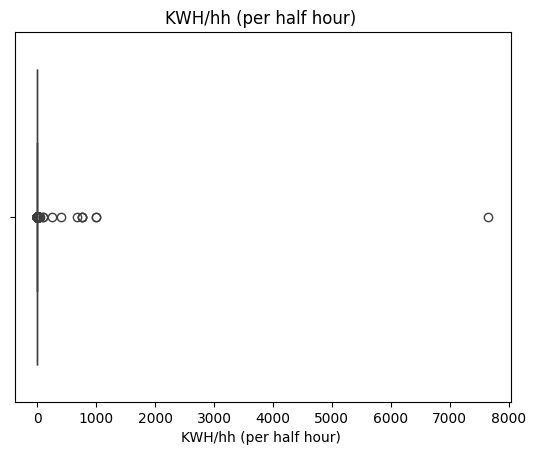

In [ ]:
sns.boxplot(SEC['KWH/hh (per half hour) '],orient='h')
plt.title('KWH/hh (per half hour) ')
plt.show()

According to the previous boxplot `KWH/hh (per half hour) ` contain anomlies

In [ ]:
#IQR
q1, q3 = np.quantile(SEC['KWH/hh (per half hour) '], [0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

SEC['AD_IQR_KWH'] = np.where((SEC['KWH/hh (per half hour) '] > upper_bound), 1, 0)

SEC

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,AD_IQR_KWH
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,0
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,0
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,0
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,0
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,0
...,...,...,...,...,...,...
1436635,MAC000100,2013-12-31 21:30:00,0.156,N,B,0
1436636,MAC000100,2013-12-31 22:00:00,0.156,N,B,0
1436637,MAC000100,2013-12-31 22:30:00,0.156,N,B,0
1436638,MAC000100,2013-12-31 23:00:00,0.156,N,B,0


In [ ]:
from pyod.models.mad import MAD

# Identifying Column needed for check
data = SEC['KWH/hh (per half hour) ']
data = data.values.reshape(-1, 1)

# Initiate Model
mad_detector = MAD()

# Fitting/Training Data
mad_detector.fit(data)

# Get Data Labels
SEC['AD_MAD'] = mad_detector.labels_

In [ ]:
SEC['AD_Final'] = np.where((SEC['AD_IQR_KWH'] == 1) & (SEC['AD_MAD'] == 1), 1, 0)

In [ ]:
# replace the anomalies with the median
SEC['KWH/hh (per half hour) '] = np.where(SEC['AD_Final']==1,np.median(SEC['KWH/hh (per half hour) ']),SEC['KWH/hh (per half hour) '])

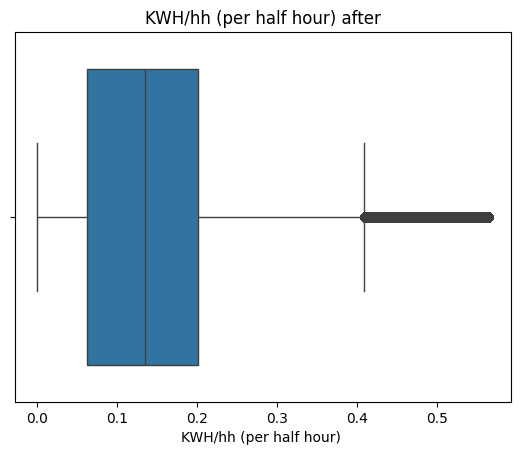

In [ ]:
sns.boxplot(SEC['KWH/hh (per half hour) '],orient='h')
plt.title('KWH/hh (per half hour) after')
plt.show()

In [ ]:
SEC.drop(['AD_IQR_KWH','AD_MAD','AD_Final'],axis=1,inplace=True)
SEC

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,2013-01-01 00:00:00,0.219,A,A
1,MAC000002,2013-01-01 00:30:00,0.241,A,A
2,MAC000002,2013-01-01 01:00:00,0.191,A,A
3,MAC000002,2013-01-01 01:30:00,0.235,A,A
4,MAC000002,2013-01-01 02:00:00,0.182,A,A
...,...,...,...,...,...
1436635,MAC000100,2013-12-31 21:30:00,0.156,N,B
1436636,MAC000100,2013-12-31 22:00:00,0.156,N,B
1436637,MAC000100,2013-12-31 22:30:00,0.156,N,B
1436638,MAC000100,2013-12-31 23:00:00,0.156,N,B


In [ ]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
SEC['site_id_encode'] = le.fit_transform(SEC['site_id'])
SEC['region_encode'] = le.fit_transform(SEC['region'])
feature = SEC[['KWH/hh (per half hour) ','DateTime','region_encode','site_id_encode']]

# Extract date and time components from 'DateTime'
feature['Date'] = feature['DateTime'].dt.date
feature['Time'] = feature['DateTime'].dt.time

feature['Date_numeric'] = feature['Date'].apply(lambda x: x.toordinal())
feature['Time_numeric'] = feature['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Drop the original 'Date' and 'Time' columns as well as DateTime
feature = feature.drop(['Date', 'Time','DateTime'], axis=1)
feature = feature[['KWH/hh (per half hour) ', 'Date_numeric', 'Time_numeric','region_encode','site_id_encode']]
# Intiate Each Multivariate Model

SEC['AD_KNN'] = KNN().fit(feature).labels_
SEC['AD_LOF'] = LOF().fit(feature).labels_
SEC['AD_IForest'] = IForest().fit(feature).labels_

SEC['AD_Final_vote'] = SEC[['AD_KNN', 'AD_LOF', 'AD_IForest']].sum(axis = 1)
SEC['AD_Final_vote'] = np.where(SEC['AD_Final_vote'] > 2, 1, 0)

<ipython-input-187-f08a99460197>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['Date'] = feature['DateTime'].dt.date
<ipython-input-187-f08a99460197>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['Time'] = feature['DateTime'].dt.time


In [ ]:
#SEC[SEC['AD_Final_vote']==1]
SEC['AD_Final_vote'].value_counts()

,count
AD_Final_vote,
0,1405184
1,31456


the anomalies is lessthan 3% of the total data

In [ ]:
#return SEC to its orignal shape
SEC.drop(['site_id_encode','region_encode','AD_KNN','AD_LOF','AD_IForest','AD_Final_vote'],axis=1,inplace=True)
SEC

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,2013-01-01 00:00:00,0.219,A,A
1,MAC000002,2013-01-01 00:30:00,0.241,A,A
2,MAC000002,2013-01-01 01:00:00,0.191,A,A
3,MAC000002,2013-01-01 01:30:00,0.235,A,A
4,MAC000002,2013-01-01 02:00:00,0.182,A,A
...,...,...,...,...,...
1436635,MAC000100,2013-12-31 21:30:00,0.156,N,B
1436636,MAC000100,2013-12-31 22:00:00,0.156,N,B
1436637,MAC000100,2013-12-31 22:30:00,0.156,N,B
1436638,MAC000100,2013-12-31 23:00:00,0.156,N,B


##Exploratory Analysis

Text(0.5, 1.0, 'region')

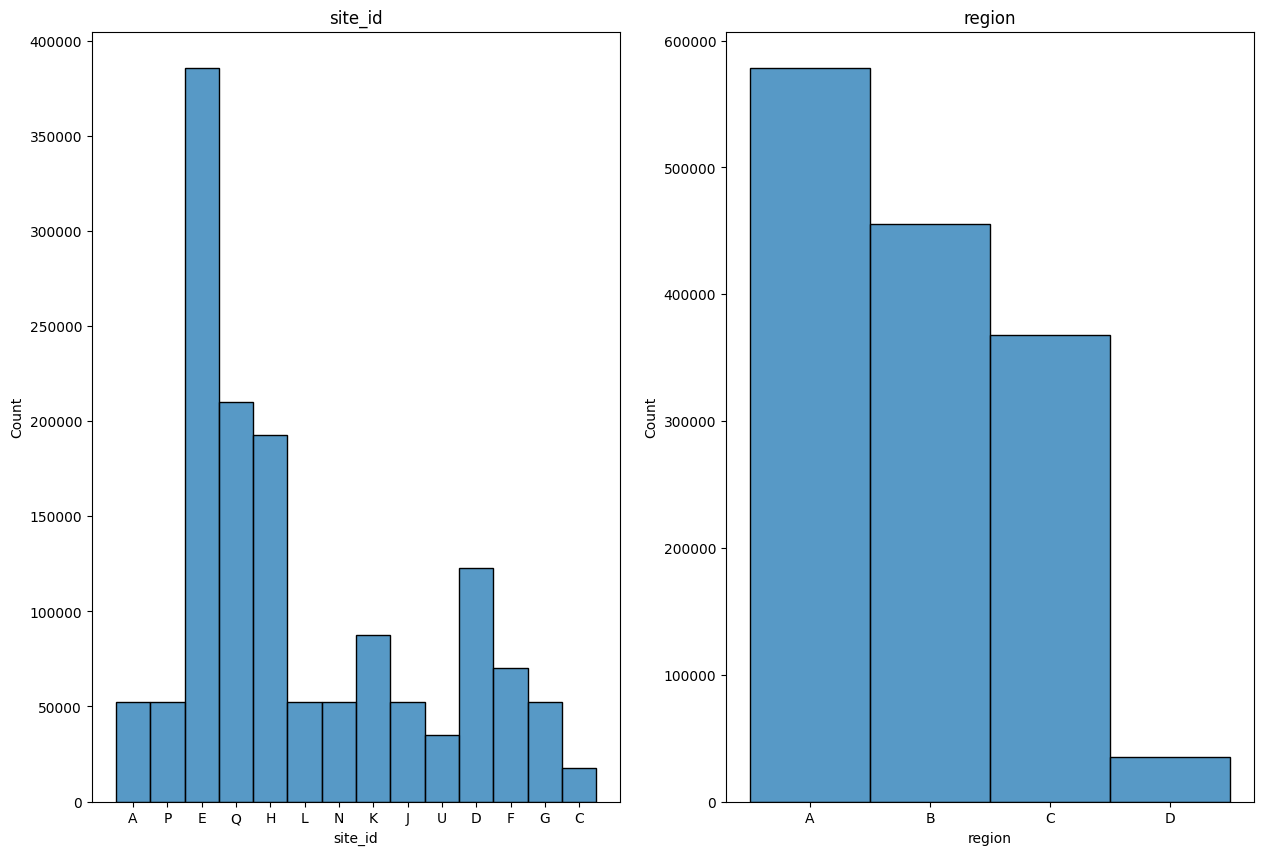

In [ ]:

fig, axis = plt.subplots(1,2, figsize = (15,10))

sns.histplot(data = SEC, x = 'site_id', ax = axis[0])
axis[0].set_title('site_id')
sns.histplot(data = SEC, x = 'region', ax = axis[1])
axis[1].set_title('region')

Text(0.5, 1.0, 'consumption of region')

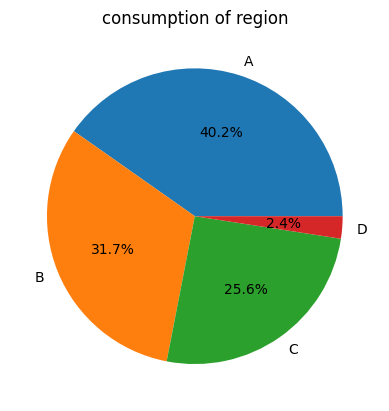

In [ ]:
pvt=pd.pivot_table(SEC,index='region',values=['KWH/hh (per half hour) '],aggfunc=['count','median'])
plt.pie(
    pvt[('count', 'KWH/hh (per half hour) ')],
    labels=pvt.index,
    autopct='%1.1f%%'
);

plt.title('consumption of region')

region `A` has the most cell and most consumption

region `D` has the least Cells and least consumption

In [ ]:
no_cells=len(SEC['cell_id'].unique())
print(f'There are {no_cells} cells')

There are 82 cells


In [ ]:
#Cells in region A
region_A = SEC[SEC['region']=='A']
no_A=len(region_A['cell_id'].unique())
Site_A=region_A['site_id'].unique()
print(f'There are {no_A} cells in region A')
print(f'There are {len(Site_A)} site in region A')
# cells in region B
region_B = SEC[SEC['region']=='B']
no_B=len(region_B['cell_id'].unique())
Site_B=region_B['site_id'].unique()
print(f'There are {no_B} cells in region B')
print(f'There are {len(Site_B)} site in region B')
#Cells in region C
region_C = SEC[SEC['region']=='C']
no_C=len(region_C['cell_id'].unique())
Site_C=region_C['site_id'].unique()
print(f'There are {no_C} cells in region C')
print(f'There are {len(Site_C)} site in region C')
#Cells in region D
region_D = SEC[SEC['region']=='D']
no_D=len(region_D['cell_id'].unique())
Site_D=region_D['site_id'].unique()
print(f'There are {no_D} cells in region D')
print(f'There are {len(Site_D)} site in region D')
regions = [no_A,no_B,no_C,no_D]
regions
print(Site_A)
print(Site_B)
print(Site_C)
print(Site_D)

There are 33 cells in region A
There are 4 site in region A
There are 26 cells in region B
There are 5 site in region B
There are 21 cells in region C
There are 4 site in region C
There are 2 cells in region D
There are 1 site in region D
['A' 'E' 'D' 'C']
['P' 'Q' 'L' 'N' 'K']
['H' 'J' 'F' 'G']
['U']


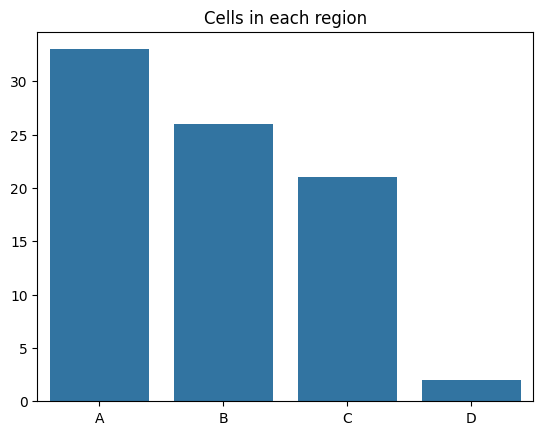

In [ ]:
sns.barplot(x=['A','B','C','D'],y=regions)
plt.title('Cells in each region')
plt.show()

In [ ]:
#consumption of each region
reg_com=SEC.pivot_table(index='region',values='KWH/hh (per half hour) ',aggfunc='median')

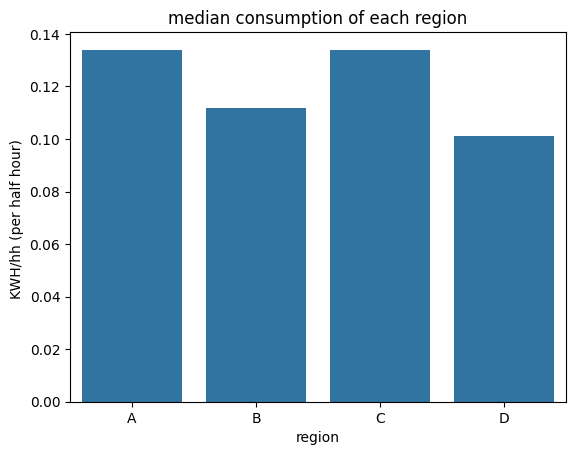

In [ ]:
sns.barplot(y=reg_com['KWH/hh (per half hour) '],x=reg_com.index)
plt.title('median consumption of each region')
plt.show()

In [ ]:
# connecting two data frames
new_SEC = SEC.merge(Demand_df, on='DateTime', how='inner')  # Use merge for more flexibility

new_SEC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436640 entries, 0 to 1436639
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   cell_id                  1436640 non-null  object        
 1   DateTime                 1436640 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   1436640 non-null  float64       
 3   site_id                  1436640 non-null  object        
 4   region                   1436640 non-null  object        
 5   Demand                   1436640 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 65.8+ MB


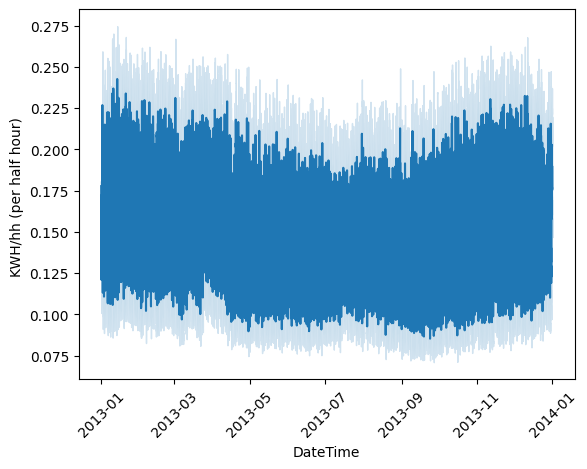

In [ ]:
sns.lineplot(x=new_SEC['DateTime'],y=new_SEC['KWH/hh (per half hour) '])
plt.xticks(rotation=45)
plt.show()

#  Feature Engineering

In [ ]:
vlue={
    'Low':6.89/2,
    'Normal':19.46/2,
    'High':77.21/2
}
new_SEC['KWH/hh for Demand'] = new_SEC['Demand'].map(vlue)
new_SEC

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,KWH/hh for Demand
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,9.73
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,9.73
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,9.73
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,9.73
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,9.73
...,...,...,...,...,...,...,...
1436635,MAC000100,2013-12-31 21:30:00,0.156,N,B,Normal,9.73
1436636,MAC000100,2013-12-31 22:00:00,0.156,N,B,Normal,9.73
1436637,MAC000100,2013-12-31 22:30:00,0.156,N,B,Normal,9.73
1436638,MAC000100,2013-12-31 23:00:00,0.156,N,B,Normal,9.73


In [ ]:
new_SEC['cost'] = new_SEC['KWH/hh (per half hour) '] * new_SEC['KWH/hh for Demand']
new_SEC

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,KWH/hh for Demand,cost
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,9.73,2.13087
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,9.73,2.34493
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,9.73,1.85843
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,9.73,2.28655
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,9.73,1.77086
...,...,...,...,...,...,...,...,...
1436635,MAC000100,2013-12-31 21:30:00,0.156,N,B,Normal,9.73,1.51788
1436636,MAC000100,2013-12-31 22:00:00,0.156,N,B,Normal,9.73,1.51788
1436637,MAC000100,2013-12-31 22:30:00,0.156,N,B,Normal,9.73,1.51788
1436638,MAC000100,2013-12-31 23:00:00,0.156,N,B,Normal,9.73,1.51788


In [ ]:
new_SEC['month']=new_SEC['DateTime'].dt.month_name()
new_SEC

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,KWH/hh for Demand,cost,month
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,9.73,2.13087,January
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,9.73,2.34493,January
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,9.73,1.85843,January
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,9.73,2.28655,January
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,9.73,1.77086,January
...,...,...,...,...,...,...,...,...,...
1436635,MAC000100,2013-12-31 21:30:00,0.156,N,B,Normal,9.73,1.51788,December
1436636,MAC000100,2013-12-31 22:00:00,0.156,N,B,Normal,9.73,1.51788,December
1436637,MAC000100,2013-12-31 22:30:00,0.156,N,B,Normal,9.73,1.51788,December
1436638,MAC000100,2013-12-31 23:00:00,0.156,N,B,Normal,9.73,1.51788,December


In [ ]:
new_SEC['time of day']=pd.cut(new_SEC['DateTime'].dt.hour,bins=[0,6,12,18,24],labels=['night','morning','afternoon','evening'],right=False)
#new_SEC['time of day'] = pd.cut(pd.to_datetime(new_SEC['Time'], format='%H:%M:%S').dt.hour, bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'],right=False)
new_SEC

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,KWH/hh for Demand,cost,month,time of day
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,9.73,2.13087,January,night
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,9.73,2.34493,January,night
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,9.73,1.85843,January,night
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,9.73,2.28655,January,night
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,9.73,1.77086,January,night
...,...,...,...,...,...,...,...,...,...,...
1436635,MAC000100,2013-12-31 21:30:00,0.156,N,B,Normal,9.73,1.51788,December,evening
1436636,MAC000100,2013-12-31 22:00:00,0.156,N,B,Normal,9.73,1.51788,December,evening
1436637,MAC000100,2013-12-31 22:30:00,0.156,N,B,Normal,9.73,1.51788,December,evening
1436638,MAC000100,2013-12-31 23:00:00,0.156,N,B,Normal,9.73,1.51788,December,evening


## Data Insights

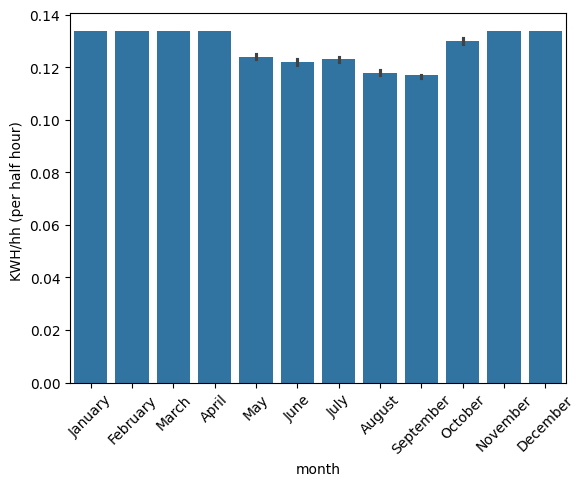

In [ ]:
sns.barplot(data=new_SEC,x='month',y='KWH/hh (per half hour) ',estimator='median')
plt.xticks(rotation=45)
plt.show()

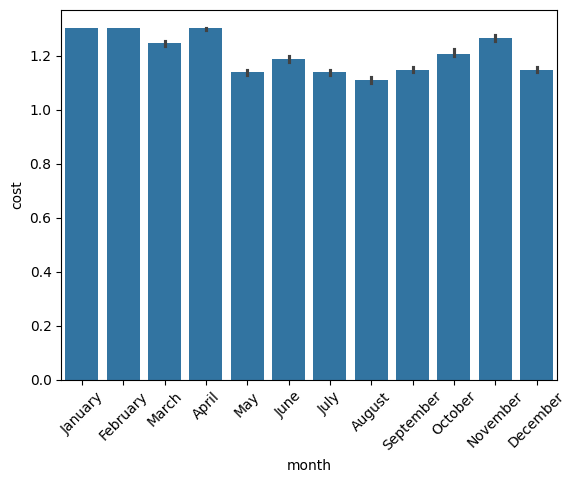

In [ ]:
sns.barplot(data=new_SEC,x='month',y='cost',estimator='median')
plt.xticks(rotation=45)
plt.show()

May, June, July, August and September have the least Energy consumed

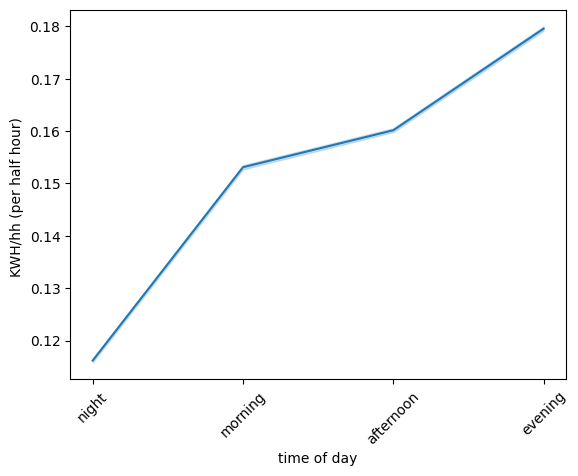

In [ ]:
sns.lineplot(data=new_SEC,x='time of day',y='KWH/hh (per half hour) ')
plt.xticks(rotation=45)
plt.show()

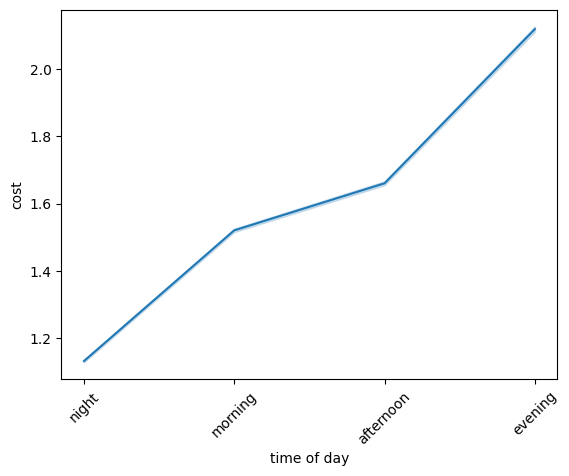

In [ ]:
sns.lineplot(data=new_SEC,x='time of day',y='cost')
plt.xticks(rotation=45)
plt.show()

#Hypothesis

## Hypothesis Formulation:
H0:there is a diffrence in cost according to region

HA: there is no difference

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

test=pg.anova(data = new_SEC, dv = 'KWH/hh (per half hour) ', between = 'region', detailed = True)
p_value = test['p-unc'][0]
print(test)
if p_value < 0.05:
  print('Reject H0')
else:
  print('Fail to reject H0')

   Source            SS       DF         MS            F  p-unc       np2
0  region    271.265769        3  90.421923  6318.812567    0.0  0.013023
1  Within  20558.196411  1436636   0.014310          NaN    NaN       NaN
Reject H0


In [ ]:
pg.pairwise_tests(data = new_SEC, dv = 'KWH/hh (per half hour) ', between = 'region', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,region,A,B,False,True,55.112497,1.013286e+06,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.107940
1,region,A,C,False,True,-86.300765,7.890759e+05,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.181598
2,region,A,D,False,True,32.248060,4.042966e+04,two-sided,2.719055e-225,1.631433e-224,bonf,2.484e+223,0.162073
3,region,B,C,False,True,-134.556810,7.556740e+05,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.301023
4,region,B,D,False,True,11.494293,4.067907e+04,two-sided,1.571072e-30,9.426432e-30,bonf,3.008e+26,0.063437
5,region,C,D,False,True,67.188623,4.346987e+04,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.348111


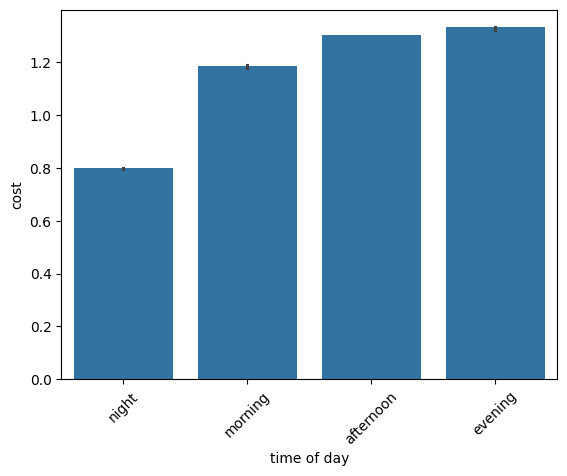

In [ ]:
sns.barplot(data=new_SEC,x='time of day',y='cost',estimator='median')
plt.xticks(rotation=45)
plt.show()

H0:there is a relationship between consumption and time of the day

HA: ther is no relation

In [ ]:
pg.anova(data = new_SEC, dv = 'KWH/hh (per half hour) ', between = 'time of day', detailed = True)


,Source,SS,DF,MS,F,p-unc,np2
0,time of day,758.305600,3,252.768533,18092.448883,0.0,0.036405
1,Within,20071.156581,1436636,0.013971,NaN,NaN,NaN


In [ ]:
pg.pairwise_tests(data = new_SEC, dv = 'KWH/hh (per half hour) ', between = 'time of day', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,time of day,night,morning,False,True,-140.804517,718318.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.332267
1,time of day,night,afternoon,False,True,-167.749598,718318.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.395851
2,time of day,night,evening,False,True,-231.450368,718318.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.546171
3,time of day,morning,afternoon,False,True,-24.869691,718318.0,two-sided,1.809859e-136,1.085915e-135,bonf,4.685e+131,-0.058687
4,time of day,morning,evening,False,True,-89.824578,718318.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.211966
5,time of day,afternoon,evening,False,True,-65.878849,718318.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.155459


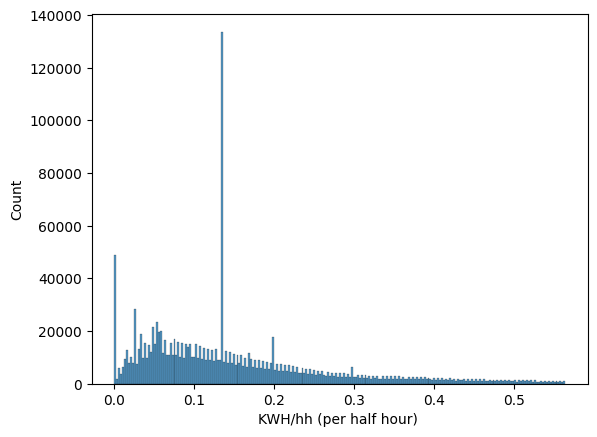

In [ ]:
sns.histplot(data=new_SEC,x='KWH/hh (per half hour) ')
plt.show()

the skewness in the data effect the p-value

#Threshold Recommendation and Cost Savings

In [ ]:
total_cost = new_SEC['cost'].sum()
print(f'Total Cost: {total_cost}')

Total Cost: 2309819.5557549996


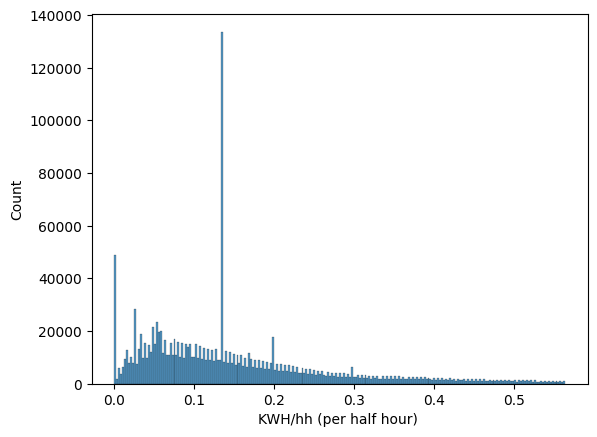

In [ ]:
sns.histplot(data=new_SEC,x='KWH/hh (per half hour) ')
plt.show()

In [ ]:
#shut all cells that are below q1
save=new_SEC.copy()
q1 = np.quantile(SEC['KWH/hh (per half hour) '], 0.25)

#Instead of reassigning save, create a new column 'KWH_saved' in the 'save' DataFrame
save['KWH_saved'] = np.where(save['KWH/hh (per half hour) '] < q1, 0, save['KWH/hh (per half hour) '])

#Calculate the cost based on the 'KWH_saved' column
save['cost_saved'] = save['KWH_saved'] * save['KWH/hh for Demand']

#Calculate the total saved cost
save_cost = save['cost_saved'].sum()
print(f'Total Cost: {save_cost}')

Total Cost: 2191865.98879


In [ ]:
q1

0.062

In [ ]:
total_cost-save_cost

117953.56696499977

In [ ]:
#shut all cells that are below the mean with 1 standard deviation
men=new_SEC['KWH/hh (per half hour) '].mean()
std=new_SEC['KWH/hh (per half hour) '].std()
print(f'mean: {men}')
print(f'std: {std}')
st1=men-std
print (st1)

mean: 0.1522549267735827
std: 0.12041073359447263
0.03184419317911008


In [ ]:
save2=new_SEC.copy()

#Instead of reassigning save, create a new column 'KWH_saved' in the 'save' DataFrame
save2['KWH_saved'] = np.where(save2['KWH/hh (per half hour) '] < st1, 0, save2['KWH/hh (per half hour) '])

#Calculate the cost based on the 'KWH_saved' column
save2['cost_saved'] = save2['KWH_saved'] * save2['KWH/hh for Demand']

#Calculate the total saved cost
save_cost = save2['cost_saved'].sum()
print(f'Total Cost: {save_cost}')

Total Cost: 2286892.2853599996


In [ ]:
total_cost-save_cost

22927.270395